In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def cf(x,m,c):
  return m*np.array(x)+c
#Constants
e = 1.602e-19
c = 3e8

Derived Plancks Constant -  3.029856839227557e-34


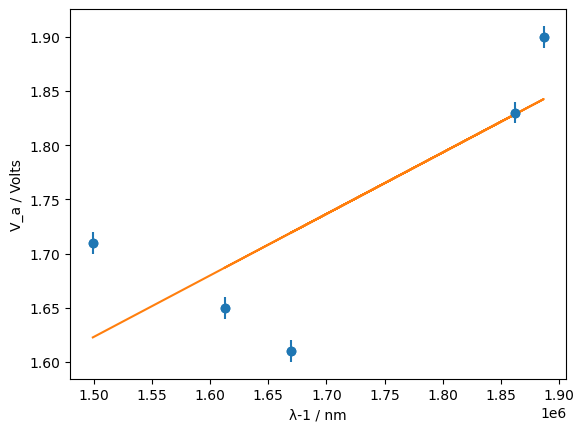

In [ ]:
#Part 2
#Wavelengths and Uncertainity
y = [0.65,0.51,0.61,0.52,0.73]
Δy = [0.075,0.08,0.04,0.08,0.04]                # Uncertainity of y in 𝜆=d(y/(y^2+L^2)^(1/2))
𝜆 = [620e-9,530e-9,599e-9,537e-9,667e-9] # Order - Diode 1, 2, 3, 9, 10
𝜆_inv = 1/np.array(𝜆)
Δ𝜆 = 2*np.array(𝜆)*(np.array(Δy)/np.array(y))*1e-6     #Δ𝜆 = 2*𝜆(Δy/y))*1e-6
Δ𝜆_inv = (np.array(Δ𝜆)/np.array(𝜆))*np.array(𝜆_inv)    #Uncertainity was negligible Δ𝜆/𝜆 ≃ 1e-5

#Part 3 - Method 1
#Data
#LED Activation Voltage
V_on = [1.65,1.90,1.61,1.83,1.71]

#Plotting
plt.scatter(𝜆_inv,V_on)
plt.xlabel('λ-1 / nm')
plt.ylabel('V_a / Volts')
#Error Bars and CurveFit
plt.errorbar(𝜆_inv,V_on,yerr=0.01,fmt ='o')   # Activation Voltage vs 1/Wavelength
para_h,c1= curve_fit(cf,𝜆_inv,V_on,[1,-1])

plt.plot(𝜆_inv,cf(𝜆_inv,para_h[0],para_h[1])) # Gradient=para_h[0], y-intercept = para_h[1]
print("Derived Plancks Constant - ",(e/c)*para_h[0])    # h = (e/c)*Gradient(V_a=hc/e(1/𝜆)+ϕ/e)

With Method 1 Plancks constant was found to be 3.02e-34 which is of the order of Plancks constant. Uncertainity was determined through the length of the light spread when measuring y.

In [ ]:
#Part 3 - Method 2
#Data - LED Voltage and Current
#No.1
V_LED1 =[1.504,1.607,1.703,1.785,1.845,1.88,1.91,1.933,1.955,1.973,1.989,2.01]
I_1 = [0,0.000001906577693,0.00002001906578,0.0001582459485,0.0005815061964,
       0.001152526215,0.001836987607,0.00254528122,0.003298379409,0.004061010486,0.004823641563,0.005672068637]
#No.2
V_LED2 = [1.708,1.802,1.908,2.01,2.11,2.19,2.24,2.27,2.3,2.33,2.35,2.38]
I_2 = [0,0,0,0.000001906577693,0.00002764537655,0.0002278360343,0.000695900858,
       0.001276453765,0.001944709247,0.002659675882,0.00335557674,0.004089609152]
#No.3
V_LED3 = [1.603,1.703,1.779,1.827,1.855,1.875,1.888,1.911,1.924,1.934,1.942,1.951]
I_3 = [0.000003813155386,0.00003717826501,0.0002221163012,0.0007321258341,0.001400381316,
       0.002192564347,0.00285986654,0.003698760724,0.004575786463,0.005433746425,0.00627264061,0.00708293613]
#No.9
V_LED9 = [1.904,2.01,2.11,2.2,2.3,2.39,2.47,2.54,2.59,2.64,2.68,2.71]
I_9 = [0,0.0000009532888465,0.000007626310772,0.00003336510963,0.00009056244042,
       0.0002020972355,0.0004041944709,0.000708293613,0.001168732126,0.001624404194,0.002202097235,0.002783603432]
#No.10
V_LED10 = [1.408,1.502,1.595,1.661,1.703,1.733,1.757,1.778,1.797,1.813,1.828,1.85]
I_10 = [0.0000009532888465,0.00001143946616,0.00009056244042,0.0003994280267,0.0009523355577,
        0.001611058151,0.002316491897,0.00316491897,0.003841754051,0.004613918017,0.005433746425,0.006196377502]


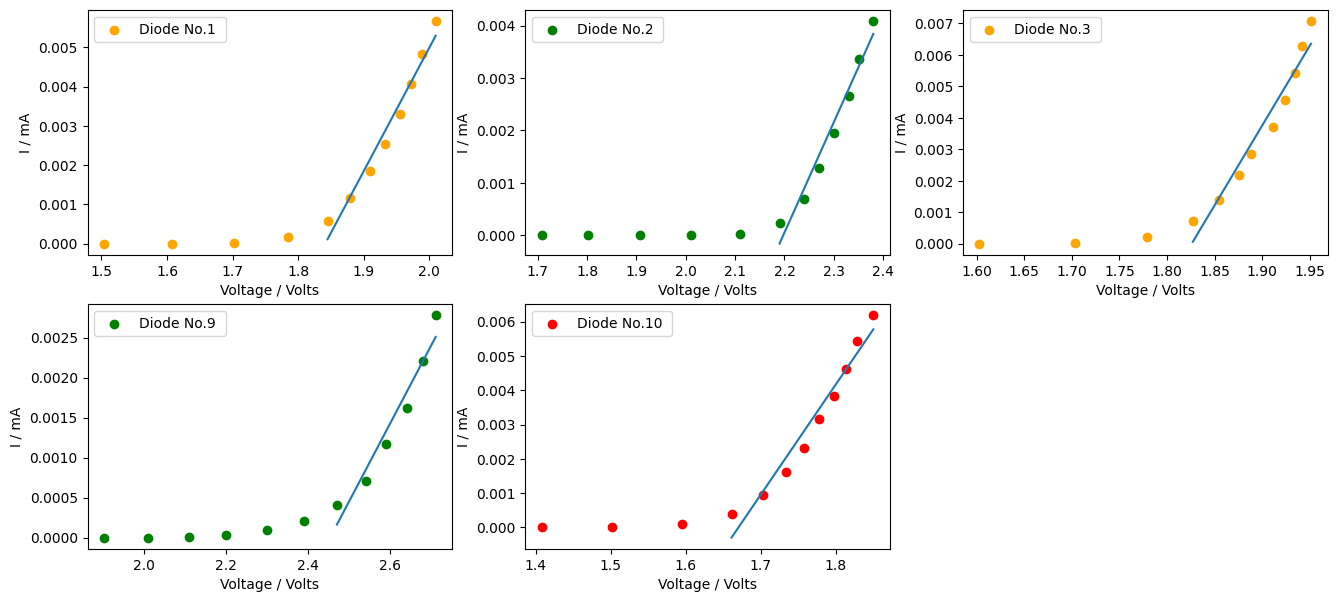

In [ ]:
#Plotting
plt.figure(figsize=(16, 7))

#Diode No.1
plt.subplot(231)
plt.scatter(V_LED1,I_1,label = 'Diode No.1 ',color='orange')
plt.xlabel('Voltage / Volts')
plt.ylabel('I / mA')
#CurveFit
para_D1,c1= curve_fit(cf,V_LED1[4:],I_1[4:],[1,-1]) # From point 5 Current increases linearly with voltage
plt.plot(V_LED1[4:],cf(V_LED1[4:],para_D1[0],para_D1[1])) # Gradient=para_D1[0], y-intercept = para_D1[1]
plt.legend()

#Diode No.2
plt.subplot(232)
plt.scatter(V_LED2,I_2,label = 'Diode No.2 ',color='g')
plt.xlabel('Voltage / Volts')
plt.ylabel('I / mA')
#CurveFit
para_D2,c1= curve_fit(cf,V_LED2[5:],I_2[5:],[1,-1]) # From point 6 Current increases linearly with voltage
plt.plot(V_LED2[5:],cf(V_LED2[5:],para_D2[0],para_D2[1])) # Gradient=para_D2[0], y-intercept = para_D2[1]
plt.legend()

#Diode No.3
plt.subplot(233)
plt.scatter(V_LED3,I_3,label = 'Diode No.3 ',color='orange')
plt.xlabel('Voltage / Volts')
plt.ylabel('I / mA')
#CurveFit
para_D3,c1= curve_fit(cf,V_LED3[3:],I_3[3:],[1,-1]) # From point 4 Current increases linearly with voltage
plt.plot(V_LED3[3:],cf(V_LED3[3:],para_D3[0],para_D3[1])) # Gradient=para_D3[0], y-intercept = para_D3[1]
plt.legend()

#Diode No.9
plt.subplot(234)
plt.scatter(V_LED9,I_9,label = 'Diode No.9 ',color='g')
plt.xlabel('Voltage / Volts')
plt.ylabel('I / mA')
#CurveFit
para_D9,c1= curve_fit(cf,V_LED9[6:],I_9[6:],[1,-1]) # From point 7 Current increases linearly with voltage
plt.plot(V_LED9[6:],cf(V_LED9[6:],para_D9[0],para_D9[1])) # Gradient=para_D9[0], y-intercept = para_D9[1]
plt.legend()

#Diode No.10
plt.subplot(235)
plt.scatter(V_LED10,I_10,label = 'Diode No.10 ',color='r')
plt.xlabel('Voltage / Volts')
plt.ylabel('I / mA')
#CurveFit
para_D10,c1= curve_fit(cf,V_LED10[3:],I_10[3:],[1,-1]) # From point 4 Current increases linearly with voltage
plt.plot(V_LED10[3:],cf(V_LED10[3:],para_D10[0],para_D10[1])) # Gradient=para_D10[0], y-intercept = para_D10[1]
plt.legend()

Derived Plancks Constant -  9.522336206209806e-34


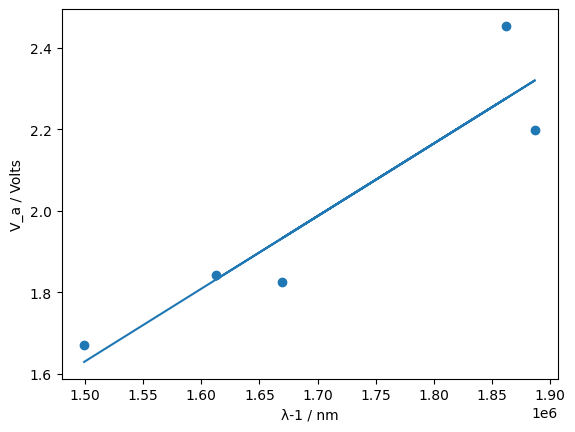

In [ ]:
#Obtained Data - Activation Voltage, 1/Wavelength
V_a = [-para_D1[1]/para_D1[0],-para_D2[1]/para_D2[0],    # Activation Voltage: x-intercept Calculation y=mx+c , x_0= -c/m
        -para_D3[1]/para_D3[0],-para_D9[1]/para_D9[0],
        -para_D10[1]/para_D10[0]]
𝜆_inv = [1/620e-9,1/530e-9,1/599e-9,1/537e-9,1/667e-9]
#Plotting
plt.scatter(𝜆_inv,V_a) # Activation Voltage vs 1/Wavelength
plt.xlabel('λ-1 / nm')
plt.ylabel('V_a / Volts')
#CurveFit
para_h,c1= curve_fit(cf,𝜆_inv,V_a,[1,-1])
plt.plot(𝜆_inv,cf(𝜆_inv,para_h[0],para_h[1])) # Gradient=para_h[0], y-intercept = para_h[1]
print("Derived Plancks Constant - ",(e/c)*para_h[0]) # h = (e/c)*Gradient(V_a=hc/e(1/𝜆)+ϕ/e)

Compared to Method 1, Method 2 yields a closer value to Plancks constant.